# HoloViz Python dashboards for ocean data  from diving, autonomous floats

**Emilio Mayorga**  
Senior Oceanographer  
Applied Physics Laboratory  
University of Washington, Seattle  
emiliomayorga@gmail.com  

---------------------------

CUGOS Monthly Meeting, 2025-04-16

## Creating a Python environment to run the code in this notebook

INSTALL THESE PACKAGES, VIA CONDA OR OTHERWISE

```bash
mamba create -c conda-forge -n cugos_202504_mayorga jupyter rise webcolors uri-template jsonpointer isoduration fqdn jupyter_contrib_nbextensions requests aiohttp pooch geopandas xarray dask matplotlib zarr pyarrow fastparquet python-snappy holoviews geoviews hvplot datashader panel param jupyter_bokeh
```

## My excuse for talking about ...

- A specific type of data I'm working with.
- The (Python) tools I'm using to pre-process data and for ...
- Developing custom data exploration web applications (dashboards).

Hopefully just enough details to whet your appetite!

### Specifically

- Depth-profiling (diving) floats, and their data
- The `HoloViz` ecosystem of interrelated Python packages for interactive data visualization and web app development 
- Two* specific examples (two projects) with dashboards for such data

<small>* Maybe 3 ...</small>

## Depth-profiling (diving) floats

- Largely passive, not self-propelled
- Buoyancy is controlled by changing its density via a bladder that's contracted (lower volume -> higher density -> sinking) or expanded (ascending)
- At the surface, transmits data and receives instructions via satellite
- Latitude and longitude positions (from GPS) available only when float surfaces
- May be "nudged" towards a target path by adjusting 2 parameters at each "dive": **what depth to "park" at, and for how long**

### Argo floats & Argo network

Most widespread type and use are the "Argo" floats that are part of the global Argo network (https://argo.ucsd.edu). They feature a standard set of sensors, follow a fixed descending-and-ascending behavior, and feed into a common data system. Data are openly available

![Argo global deployments status](img/argo_status_small.png)

These projects are not feeding data to Argo, yet.

 ### Depth-profiling floats
 
 ![Profiling floats, profile navigation behavior](img/profiling_floats_argo_vs_variabledepthduration.png)
 
 1 dbar (decibar, pressure) is approx. 1 meter. EM-APEX floats also measure current velocity.

 ### Components of a dive
    
 ![Components and events from a float dive](img/emapex_profile_events.png)  

## Two projects: SQUID and ALFAC

- SQUID: Sampling QUantitative Internal-wave Distributions
- ALFAC: Array of Lagrangian Floats for Areal Coverage

*Will try to share the code for both apps on GitHub in the future. But it'll take some work*

### Projects: SQUID

- https://www.apl.uw.edu/project/project.php?id=squid. Led by James Girton, APL
- Its goal is *"to improve the broad-scale characterization of internal wave climates through global deployments of autonomous profiling floats measuring shear, strain, and turbulent mixing"*. And to develop data standards and mechanisms to make data from EM-APEX floats more widely accessible and shareable.
- Deployments around the world
- HoloViz/Panel app: https://squid-test1.azurewebsites.net

### Projects: ALFAC

- No public website. Led by Zoltan Szuts, APL
- Developing a *"shoreside autonomy software, 'FlowPilot', that selects dive parameters (park depth & duration) to align with ocean currents favorable to the chosen sampling mission. FlowPilot uses in-situ float data and external data sources to predict float drift paths using multiple prediction methods, evaluates the prediction uncertainties, and makes a recommendation for the next dive in real-time."*
- Deployment of clusters of floats within specific areas, for experiments. So far, in the Western Pacific and Gulf Stream.
- HoloViz/Panel app is for internal use only at this time

## HoloViz ecosystem of packages, https://holoviz.org

![HoloViz packages](img/holoviz_packages.png)

- *"a set of open-source Python packages to streamline the entire process of working with small and large datasets [for visualization and exploration] in a web browser"*
- Run from scripts/modules or Jupyter notebook
- Support different plotting backends (matplotlib, plotly, etc), but `bokeh` is more "native"
- Apps usually require server deployment and Python environment, but light-weight apps may be client-side
- Great set of working tutorials and examples, for individual packages and integrated scenarios. https://holoviz.org/tutorial/
- **I will focus on:** `Panel`, `HoloViews`, `GeoViews`, `hvPlot`, `param`

## Explore HoloViews, GeoViews and hvPlot

With a built-in `Panel` app (`hvplot.explorer`) on the side

In [1]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import hvplot.pandas # noqa
import warnings
warnings.simplefilter("ignore", category=UserWarning)

data_dpth = Path("./data")

In [2]:
trajectories_gdf = gpd.read_parquet(data_dpth / "gps_deployments_lines_allexperiments.geoparquet")

trajectories_start_gdf = trajectories_gdf.set_geometry('point_start_geom').drop(columns='geometry')

# Default GeoDataFrame plotting with matplotlib: trajectories_start_gdf.plot()
trajectories_start_gdf.hvplot()

:Points   [x,y]

In [3]:
# Customize a bit
trajectories_start_gdf.hvplot(
    geo=True,
    by='experiment', 
    hover_cols=['deployment', 'datetime_min'], 
    tiles='EsriNatGeo',
    tools=['undo', 'hover'],
)

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .NdOverlay.I :NdOverlay   [experiment]
      :Points   [Longitude,Latitude]   (deployment,datetime_min)

In [4]:
# Out-of-the-box hvplot explorer
pd.DataFrame(trajectories_start_gdf).hvplot.explorer()

hvDataFrameExplorer(advanced=Advanced(explorer=..., name='Advanced00992', opts=None), axes=Axes(explorer=..., height=None, legend='bottom_right', logx=False, logy=False, name='Axes00986', responsive=True, shared_axes=True, width=None, xlim=None, ylim=None), by=[], code="df.hvplot(\n    kind='scatter',\n    x='deployment',\n    legend='bottom_right',\n    widget_location='bottom',\n)", colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping00987', rescale_discrete_levels=True, symmetric=False), geographic=Geographic(crs=None, crs_kwargs={}, explorer=..., feature_scale='110m', features=None, geo=False, global_extent=None, name='Geographic00989', project=False, projection=None, projection_kwargs={}, tiles=None), groupby=[], kind='scatter', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels00988', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer00964', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations00990', rasterize=False, x_sampling=None, y_sampling=None), statusbar=StatusBar(live_update=True, name='StatusBar00979'), style=Style(alpha=1, explorer=..., name='Style00991'), x='deployment', y='experiment', y_multi=[], z=None)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
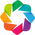

:Layout
   .Points.I :Points   [Longitude,Latitude]   (experiment,deployment,datetime_min,datetime_max,lon_min,lon_max,lat_min,lat_max,lon_start,lat_start,trajectory,obs,flid,depl)
   .Path.I   :Path   [Longitude,Latitude]

In [5]:
# Fall back to Geo/HoloViews. See "overlay" (*) and "layout" (+) operators
import geoviews as gv, holoviews as hv
hv.extension('bokeh')

basemaptiles = gv.tile_sources.EsriOceanBase
trajectories_start = gv.Points(trajectories_start_gdf)

trajectories_start + trajectories_gdf.hvplot(geo=True)
# Now fancier, with tiles and holoviews "options"
# ( (basemaptiles * trajectories_start.opts(tools=['hover'])).opts(xlabel='lat', ylabel='lon', title="with holoviews")
#   + trajectories_gdf.hvplot(geo=True, tiles='OSM', title='with hvplot')
# )

In [6]:
import hvplot.xarray
import xarray as xr

xr_ds = xr.tutorial.open_dataset('air_temperature').load()
xr_ds

# -- Alternatively, can play with this Zarr dataset accessed from the cloud
# From https://pangeo-forge.org/dashboard/feedstock/78
# zarr_store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/pangeo-forge/AGDC-feedstock/AGCD.zarr'
# xr_ds = xr.open_dataset(zarr_store, engine='zarr', chunks={})
# Lazy loading (metadata and coordinate values only)
# Data variables loaded as lazy, chunked "Dask" arrays
# print(f"Total size (not downloaded size!): {xr_ds.nbytes/1e9:.1f} GB")
# xr_ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [7]:
xr_ds['air'].sel(time='2013-06-01 12:00').hvplot()

:Image   [lon,lat]   (4xDaily Air temperature at sigma level 995)

In [8]:
# Let hvplot create a slider widget to interactively flip through time
xr_ds['air'].hvplot(groupby='time')

:DynamicMap   [time]
   :Image   [lon,lat]   (4xDaily Air temperature at sigma level 995)

## Quick Panel demo

Define a couple of Panel widgets and link them to a dataset via `.interactive()` method

Demo taken from https://hvplot.holoviz.org

In [9]:
import panel as pn

w_quantile = pn.widgets.FloatSlider(name='quantile', start=0, end=1)
w_time = pn.widgets.IntSlider(name='time', start=0, end=10)

(  xr_ds['air'].interactive(loc='left')
   .isel(time=w_time)
   .quantile(q=w_quantile, dim='lon')
   .hvplot(ylabel='Air Temperature [K]', width=500) )

## Source data structure and formats

## SQUID: source netCDF file and pre-processed GeoParquet files


- (Geo)Parquet: open "columnar" data store with chunking and compression, plays well in cloud object storage
- Pre-processing done with xarray, GeoPandas.
- `GeoParquet` file generated from source netCDF file, to extract point and lat-lon line geometries and aggregated attributes, for quick & convenient access in the SQUID App.
- That's the `gps_deployments_lines_allexperiments.geoparquet` file used earlier in the `hvPlot` demo. Includes both line and point geometry columns.

## SQUID: binned netCDF file, with several float "trajectories"

- A data product heavily post-processed through scripts that could be fully automated.
- Not a regular grid structure; a "discrete sampling geometries" feature type, per netCDF data model.
- Open the netCDF file with xarray, examine its structure.

In [11]:
zgrid_ds = xr.open_dataset(data_dpth / "SQUID_NCEI.nc", decode_times=False)
zgrid_ds

<xarray.Dataset> Size: 600MB
Dimensions:     (trajectory: 20, obs: 234, z: 2001, trid_len: 6)
Coordinates:
  * trajectory  (trajectory) int32 80B 1 2 3 4 5 6 7 8 ... 14 15 16 17 18 19 20
    time        (obs, trajectory) float64 37kB ...
    lat         (obs, trajectory) float64 37kB ...
    lon         (obs, trajectory) float64 37kB ...
Dimensions without coordinates: obs, z, trid_len
Data variables: (12/17)
    depth       (z) float64 16kB ...
    T           (z, obs, trajectory) float64 75MB ...
    S           (z, obs, trajectory) float64 75MB ...
    P           (z, obs, trajectory) float64 75MB ...
    U           (z, obs, trajectory) float64 75MB ...
    V           (z, obs, trajectory) float64 75MB ...
    ...          ...
    flid        (trajectory) int32 80B ...
    trid        (trid_len, trajectory) |S1 120B ...
    pid         (obs, trajectory) float64 37kB ...
    hpid        (obs, trajectory) float64 37kB ...
    depl        (trajectory) int32 80B ...
    EM-APEX     float64 8B ...
Attributes: (12/26)
    ncei_template_version:      NCEI_NetCDF_TrajectoryProfile_Incomplete_Temp...
    featureType:                trajectoryProfile
    title:                      T, S, U, V and derived quantities measured by...
    summary:                    T, S, potential density, N^2, U, V, u_z, and ...
    Conventions:                CF-1.6, ACDD-1.3
    acknowledgments:            NOPP Global Internal Wave Project. Funding fr...
    ...                         ...
    geospatial_lat_units:       degree_north
    geospatial_lon_units:       degree_east
    geospatial_vertical_units:  meters
    platform:                   EM-APEX
    references:                 
    comment:                    Deployed from multiple cruises of opportunity...

## ALFAC: FlowPilot Database (PostgreSQL)

![Complete ERD; tables used by FP Viz app are in green](img/flowpilot_schema_erd.png)

### Tables used by the FlowPilot Visualization App

![ERD, tables used by FP Viz app](img/flowpilot_schema_erd-fpvizonly.png)

## Sample SQL for pre-processing, for viz app

For `dive` data. SQL code trimmed a bit. Pulled in from DB via `pandas.read_sql_query()`. This is followed by a lot of additional processing: further data cleaning, timestamp formatting, creating point and line GeoDataFrames, creating dynamic HoloViews elements, etc.

![SQL code for querying dives](img/flowpilotviz_sqlquery_dive.png)

## The apps

Or at least screenshots

### SQUID

![SQUID App screenshot](img/app_screenshot-squid.png)

### ALFAC / FlowPilot

![ALFAC FlowPilot Visualization App screenshot](img/app_screenshot-alfacflowpilot.png)

## HoloViz code snippets from my apps

Select a "trajectory" based on change to a text widget, `trajectory_sel_text`. **The `.apply()` method in action, passing a `param` object.**

```python
def select_by_trid(hvds, trajectory_id):    
    return hvds.select(trajectory_id=trajectory_id)

selected_trajectory_layer = (
    gps_deployments_hvPath.relabel("Selected trajectory").apply(
        select_by_trid, 
        trajectory_id=trajectory_sel_text.param.value,
    ).opts(color='yellow', line_width=3)
)
```

Update the `trajectory_sel_text` Panel text widget based on a selection ("tap") action on `gps_deployments_hvPath` line element.

```python
traj_stream = Selection1D(source=gps_deployments_hvPath, index=[0])

@pn.depends(s=traj_stream.param.index, watch=True)
def _update_traj_select(s):
    select_index = s[0] if s else 0
    trajectory_sel_text.value = traj_lines_trajid_vs_idx[select_index]
```

Use CSS and styling properties to heavily customiz appearance and rendering of a Panel element.

```python
MARKDOWN_CSS = """
p {  margin: 1px; padding-top: 0px; padding-bottom: 0px;
     border: 0.5px solid #cccccc; font-size: 11pt;  }
"""
sel_trajectory_pn_md = pn.pane.Markdown(
    sel_traj_display_str(trajectory_id_initial),
    styles={'padding-top': '0px', 'padding-bottom': '0px'},
    stylesheets=[MARKDOWN_CSS]
)
```

Arrange app elements using Panel `Row` and `Col` elements

```python
header_bar_mission_col = pn.Column(
    pn.Row(
        fpv_md.header_bar_mission,
        fpv_widgets.mission_select),
    pn.Row(
        fpv_md.header_bar_mission_info,
        margin=0),
    margin=0, width=260,
)
```

Use a Panel web framework template.

```python
app_template = pn.template.FastListTemplate(
    title=title_str, sidebar_width=400,
    sidebar=[pn.pane.Markdown(description_md), pn.pane.Markdown("### SQUID")],
    main=[pn.Row(traj_sel_text, sel_traj_pn_md,
           align='center', margin=0, styles={'padding-top': '0px'}),
          plots_accordion],
    theme_toggle=False, background='lightgray'
)
```

## Running the app

- Within the app code, use `my_panel_app_object.servable()` (or `my_panel_app_object.servable().show()` for testing).
- From command line: `panel serve --autoreload --global-loading-spinner --port 5100 --allow-websocket-origin='*' --log-file mylogfile.log basepath/myappnotebook.ipynb`
    - Bare bones: `panel serve basepath/myappnotebook.ipynb`

## App deployment

- **SQUID**
    - MS `Azure` (using Ubuntu Linux). https://squid-test1.azurewebsites.net
    - Maintained and developed in a local git clone
    - Updates deployed via Azure Git push. Python environment maitained via `pip` (or `Docker` container, but I wanted to keep things simple)
    - Project page https://www.apl.uw.edu/project/project.php?id=squid
- **ALFAC**
    - Everything is in APL network only, behind VPN
    - Deployment to an Ubuntu server, with Apache
    - Maintained and developed via project GitLab.
    - Updates deployed via Git pull from GitLab repo
- **TROCAS**
    - CO<sub>2</sub> at the mouth of the Amazon River, sampled continuously by boat
    - On GitHub, https://github.com/amazon-riverbgc/trocas-herokuapp1. *But the code is getting long in the tooth!*
    - Deployment to `Heroku` via Heroku CLI, as `Docker` container
    - See https://amazon-riverbgc.github.io/TROCAS/docs/databrowser.html

## Strengths and especially annoyances

For a later time .... Sigh

Ask me today or ping me any time.